In [1]:
# Martha Dunne
# C:\Users\mabdu\Practicum1a.ipynb
# anaconda Navigator
# jupyter notebook
# python 3.8
# pandas 0.25.1
# numpy 1.16.5
# matplotlib 3.1.1
# seaborn 0.9.0
#####
##### Practicum_Clean_Merge.ipynb
#####   Step 1 
#####   1_ clean and merge 3 covid wide format files into 1 long format file
#####   2- clean mobility file
#####   3- merge covid and mobility files into PracticumMergedData.csv
#####
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')
from datetime import datetime, timedelta

### Covid-19 John Hopkins dataset
### Data starts 2020-01-22, usually current to yesterday

In [2]:
# Using the John hopkins dataset which updates daily
# Feature selection removed the recovered file during testing
# originally investigated with all three files/fields, decided not all were used
df_cases = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
df_deaths = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
#df_recovered = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")

In [3]:
# Covid data all three fles are wide format
df_cases 

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,37015,37054,37054,37162,37269,37345,37424,37431,37551,37596
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,6151,6275,6411,6536,6676,6817,6971,7117,7260,7380
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,34155,34693,35160,35712,36204,36699,37187,37664,38133,38583
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,955,955,955,963,963,977,981,989,989,989
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,1538,1572,1672,1679,1735,1762,1815,1852,1879,1906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,13722,13928,14208,14510,14875,15184,15491,15834,16153,16534
262,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,10,10,10,10,10,10,10,10,10,10
263,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,1796,1797,1804,1832,1831,1841,1847,1858,1858,1869
264,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,7486,7903,8085,8210,8275,8501,8663,9021,9186,9343


In [4]:
# define function to convert all three files to long format
# Pandas.melt() unpivots a DataFrame from wide format to long format.
def restructure(df):
  df.columns=list(df.columns[:4])+[datetime.strptime(i,"%m/%d/%y").strftime("%Y-%m-%d") for i in df.columns[4:]]
  df = df.melt(id_vars=["Province/State", "Country/Region","Lat","Long"], 
        var_name="Date", 
        value_name="Value")
  df.columns = ["state","country_region","latitude","longitude","date","value"]
  df.date = pd.to_datetime(df.date)
  return df

In [5]:
# Call restructure function to unpivot dataframe into long format
# Will need to rename value column in each file before merge files
df_cases = restructure(df_cases)
df_deaths = restructure(df_deaths)
# df_recovered = restructure(df_recovered)

In [6]:
# data begins Jan 22, 2020 and is current to yesterdays date
# state, country_region, latitude, longitudem date, value
df_cases

,state,country_region,latitude,longitude,date,value
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0
1,NaN,Albania,41.153300,20.168300,2020-01-22,0
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0
...,...,...,...,...,...,...
55323,NaN,West Bank and Gaza,31.952200,35.233200,2020-08-16,16534
55324,NaN,Western Sahara,24.215500,-12.885800,2020-08-16,10
55325,NaN,Yemen,15.552727,48.516388,2020-08-16,1869
55326,NaN,Zambia,-13.133897,27.849332,2020-08-16,9343


In [7]:
# max cases US @ 5 million August 9, 2020
df_cases.describe()

,latitude,longitude,value
count,55328.000000,55328.000000,5.532800e+04
mean,21.076624,22.829441,2.192685e+04
std,24.857968,70.059900,1.690628e+05
min,-51.796300,-135.000000,0.000000e+00
25%,6.611100,-15.310100,6.000000e+00
50%,22.820850,20.921188,2.030000e+02
75%,41.153300,78.962880,1.918750e+03
max,71.706900,178.065000,5.403213e+06


In [8]:
# After convert wide to long, need to rename value column (cases, deaths, recovered) in each file before merge files
df_cases = df_cases.rename(columns={'value':'cases'})

In [9]:
df_deaths = df_deaths.rename(columns={'value':'deaths'})

In [10]:
df_cases.dtypes

state                     object
country_region            object
latitude                 float64
longitude                float64
date              datetime64[ns]
cases                      int64
dtype: object

In [11]:
# necessary to set object to type string for merge, or will get error 
# validate the merge keys dtypes. We may need to coerce
df_cases.state = df_cases.state.astype(str)
df_cases.country_region = df_cases.country_region.astype(str)
df_deaths.state = df_deaths.state.astype(str)
df_deaths.country_region = df_deaths.country_region.astype(str)

In [12]:
# merge long covid files
dfs = [df_cases, df_deaths]
df = pd.merge(dfs[0], dfs[1], left_on=['state','country_region','latitude','longitude','date'], right_on=['state','country_region','latitude','longitude','date'], how='outer')
for d in dfs[2:]:
    df = pd.merge(df, d, left_on=['state','country_region','latitude','longitude','date'], right_on=['state','country_region','latitude','longitude','date'], how='outer')

In [13]:
df

,state,country_region,latitude,longitude,date,cases,deaths
0,nan,Afghanistan,33.939110,67.709953,2020-01-22,0,0
1,nan,Albania,41.153300,20.168300,2020-01-22,0,0
2,nan,Algeria,28.033900,1.659600,2020-01-22,0,0
3,nan,Andorra,42.506300,1.521800,2020-01-22,0,0
4,nan,Angola,-11.202700,17.873900,2020-01-22,0,0
...,...,...,...,...,...,...,...
55323,nan,West Bank and Gaza,31.952200,35.233200,2020-08-16,16534,110
55324,nan,Western Sahara,24.215500,-12.885800,2020-08-16,10,1
55325,nan,Yemen,15.552727,48.516388,2020-08-16,1869,530
55326,nan,Zambia,-13.133897,27.849332,2020-08-16,9343,260


In [14]:
# validation_date = save date to use for data validation for countries needing aggregation
validation_date = datetime.strftime(datetime.now() - timedelta(2), '%Y-%m-%d')
print('Save date for validation purposes is ', validation_date)

Save date for validation purposes is  2020-08-15


In [15]:
# for covid data validation can compare US Covid numbers with external sources 
df[df.country_region.str.contains('US',case=True) & (df['date'] > validation_date)] 

,state,country_region,latitude,longitude,date,cases,deaths
55304,nan,US,40.0,-100.0,2020-08-16,5403213,170052


In [16]:
# covid data has some countries need to be aggregated to country_region
# print Australia as an example
df[df.country_region.str.contains('Australia',case=True) & (df['date'] > validation_date)] 

,state,country_region,latitude,longitude,date,cases,deaths
55070,Australian Capital Territory,Australia,-35.4735,149.0124,2020-08-16,113,3
55071,New South Wales,Australia,-33.8688,151.2093,2020-08-16,3957,52
55072,Northern Territory,Australia,-12.4634,130.8456,2020-08-16,33,0
55073,Queensland,Australia,-27.4698,153.0251,2020-08-16,1091,6
55074,South Australia,Australia,-34.9285,138.6007,2020-08-16,461,4
55075,Tasmania,Australia,-42.8821,147.3272,2020-08-16,230,13
55076,Victoria,Australia,-37.8136,144.9631,2020-08-16,17027,334
55077,Western Australia,Australia,-31.9505,115.8605,2020-08-16,646,9


In [17]:
# use  for validation
df[df.country_region.str.contains('Australia',case=True) & (df['date'] > validation_date)].cases.sum()

23558

In [18]:
#create a long covid dataframe of just the columns I want (ignore state, latitude, longitude)
#then groupby country_region to get Australia & others summed
df2 = df[['country_region', 'date','cases','deaths']]
df2

,country_region,date,cases,deaths
0,Afghanistan,2020-01-22,0,0
1,Albania,2020-01-22,0,0
2,Algeria,2020-01-22,0,0
3,Andorra,2020-01-22,0,0
4,Angola,2020-01-22,0,0
...,...,...,...,...
55323,West Bank and Gaza,2020-08-16,16534,110
55324,Western Sahara,2020-08-16,10,1
55325,Yemen,2020-08-16,1869,530
55326,Zambia,2020-08-16,9343,260


In [19]:
###########################################################################
# covid data for countries with regions, now can be summed to country
# groupby SUM countryregion Australia, Canada, China, Denmark, France, Netherlands, United Kingdom
# compare count to df_cases above
df3 = df2.groupby(["country_region", "date"], as_index=False)["cases","deaths"].sum()
df3

,country_region,date,cases,deaths
0,Afghanistan,2020-01-22,0,0
1,Afghanistan,2020-01-23,0,0
2,Afghanistan,2020-01-24,0,0
3,Afghanistan,2020-01-25,0,0
4,Afghanistan,2020-01-26,0,0
...,...,...,...,...
39099,Zimbabwe,2020-08-12,4893,122
39100,Zimbabwe,2020-08-13,4990,128
39101,Zimbabwe,2020-08-14,5072,128
39102,Zimbabwe,2020-08-15,5176,130


In [20]:
# TODO get count of rows per country, sort by count descending
# validate Australia now
df3[df3.country_region.str.contains('Australia',case=True) & (df3['date'] > validation_date )] 

,country_region,date,cases,deaths
1871,Australia,2020-08-16,23558,421


In [21]:
# To calculate deltacases from day before, create a temp column shifted one period, for calculation
# TODO fix delta calculation to handle country_region start date correctly 
# not critical here as mobility data starts in February so merge will eliminate
df3[['casestmp']] = df3[['cases']].shift(1) 
df3[['deathstmp']] = df3[['deaths']].shift(1)  
df3

,country_region,date,cases,deaths,casestmp,deathstmp
0,Afghanistan,2020-01-22,0,0,NaN,NaN
1,Afghanistan,2020-01-23,0,0,0.0,0.0
2,Afghanistan,2020-01-24,0,0,0.0,0.0
3,Afghanistan,2020-01-25,0,0,0.0,0.0
4,Afghanistan,2020-01-26,0,0,0.0,0.0
...,...,...,...,...,...,...
39099,Zimbabwe,2020-08-12,4893,122,4818.0,104.0
39100,Zimbabwe,2020-08-13,4990,128,4893.0,122.0
39101,Zimbabwe,2020-08-14,5072,128,4990.0,128.0
39102,Zimbabwe,2020-08-15,5176,130,5072.0,128.0


In [22]:
# this delta calculation is not handling country_region correctly so first value is suspect
# not critical here as mobility data starts in February so merge will eliminate
df3['casesdelta'] = df3['cases'] - df3['casestmp']
df3['deathsdelta'] = df3['deaths'] - df3['deathstmp']

In [23]:
df3

,country_region,date,cases,deaths,casestmp,deathstmp,casesdelta,deathsdelta
0,Afghanistan,2020-01-22,0,0,NaN,NaN,NaN,NaN
1,Afghanistan,2020-01-23,0,0,0.0,0.0,0.0,0.0
2,Afghanistan,2020-01-24,0,0,0.0,0.0,0.0,0.0
3,Afghanistan,2020-01-25,0,0,0.0,0.0,0.0,0.0
4,Afghanistan,2020-01-26,0,0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
39099,Zimbabwe,2020-08-12,4893,122,4818.0,104.0,75.0,18.0
39100,Zimbabwe,2020-08-13,4990,128,4893.0,122.0,97.0,6.0
39101,Zimbabwe,2020-08-14,5072,128,4990.0,128.0,82.0,0.0
39102,Zimbabwe,2020-08-15,5176,130,5072.0,128.0,104.0,2.0


In [24]:
# To calculate deltacases 2 weeks later, create temp column shifted for calculation
df3[['casestmp13']] = df3[['cases']].shift(13) 
df3[['deathstmp13']] = df3[['deaths']].shift(13)  
df3[['casestmp14']] = df3[['cases']].shift(14) 
df3[['deathstmp14']] = df3[['deaths']].shift(14)

In [25]:
# this delta calculation is not handling country_region correctly so first 14 values are suspect
# not critical here as mobility data starts in mid-February so merge will eliminate
#using for initial investigation
# if see pattern will fix later
df3['casesdelta14'] = df3['casestmp13'] - df3['casestmp14']
df3['deathsdelta14'] = df3['deathstmp13'] - df3['deathstmp14']

In [26]:
df3[df3.country_region.str.contains('Afghanistan',case=True)].head(20)

,country_region,date,cases,deaths,casestmp,deathstmp,casesdelta,deathsdelta,casestmp13,deathstmp13,casestmp14,deathstmp14,casesdelta14,deathsdelta14
0,Afghanistan,2020-01-22,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,2020-01-23,0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,2020-01-24,0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,2020-01-25,0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,2020-01-26,0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,Afghanistan,2020-01-27,0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
6,Afghanistan,2020-01-28,0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
7,Afghanistan,2020-01-29,0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
8,Afghanistan,2020-01-30,0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
9,Afghanistan,2020-01-31,0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
df3[df3.country_region.str.contains('Afghanistan',case=True)].tail(20)

,country_region,date,cases,deaths,casestmp,deathstmp,casesdelta,deathsdelta,casestmp13,deathstmp13,casestmp14,deathstmp14,casesdelta14,deathsdelta14
188,Afghanistan,2020-07-28,36368,1270,36263.0,1269.0,105.0,1.0,34994.0,1094.0,34740.0,1048.0,254.0,46.0
189,Afghanistan,2020-07-29,36471,1271,36368.0,1270.0,103.0,1.0,35070.0,1113.0,34994.0,1094.0,76.0,19.0
190,Afghanistan,2020-07-30,36542,1271,36471.0,1271.0,71.0,0.0,35229.0,1147.0,35070.0,1113.0,159.0,34.0
191,Afghanistan,2020-07-31,36675,1272,36542.0,1271.0,133.0,1.0,35301.0,1164.0,35229.0,1147.0,72.0,17.0
192,Afghanistan,2020-08-01,36710,1283,36675.0,1272.0,35.0,11.0,35475.0,1181.0,35301.0,1164.0,174.0,17.0
193,Afghanistan,2020-08-02,36710,1284,36710.0,1283.0,0.0,1.0,35526.0,1185.0,35475.0,1181.0,51.0,4.0
194,Afghanistan,2020-08-03,36747,1288,36710.0,1284.0,37.0,4.0,35615.0,1186.0,35526.0,1185.0,89.0,1.0
195,Afghanistan,2020-08-04,36782,1288,36747.0,1288.0,35.0,0.0,35727.0,1190.0,35615.0,1186.0,112.0,4.0
196,Afghanistan,2020-08-05,36829,1294,36782.0,1288.0,47.0,6.0,35928.0,1211.0,35727.0,1190.0,201.0,21.0
197,Afghanistan,2020-08-06,36896,1298,36829.0,1294.0,67.0,4.0,35981.0,1225.0,35928.0,1211.0,53.0,14.0


In [28]:
## drop columns that duplicate others or have little data
#drop_cols = ['casestmp', 'deathstmp','casestmp13', 'deathstmp13','casestmp14', 'deathstmp14']
#all_data_df.drop(drop_cols, axis=1, inplace=True)
#all_data_df.sort_values(by='price', inplace=True)
#all_data_df.reset_index(drop=True, inplace=True)
df3 = df3.drop(['casestmp'], axis=1).drop(['deathstmp'], axis=1)
df3 = df3.drop(['casestmp13'], axis=1).drop(['deathstmp13'], axis=1)
df3 = df3.drop(['casestmp14'], axis=1).drop(['deathstmp14'], axis=1)

In [29]:
df3

,country_region,date,cases,deaths,casesdelta,deathsdelta,casesdelta14,deathsdelta14
0,Afghanistan,2020-01-22,0,0,NaN,NaN,NaN,NaN
1,Afghanistan,2020-01-23,0,0,0.0,0.0,NaN,NaN
2,Afghanistan,2020-01-24,0,0,0.0,0.0,NaN,NaN
3,Afghanistan,2020-01-25,0,0,0.0,0.0,NaN,NaN
4,Afghanistan,2020-01-26,0,0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...
39099,Zimbabwe,2020-08-12,4893,122,75.0,18.0,213.0,12.0
39100,Zimbabwe,2020-08-13,4990,128,97.0,6.0,77.0,14.0
39101,Zimbabwe,2020-08-14,5072,128,82.0,0.0,490.0,2.0
39102,Zimbabwe,2020-08-15,5176,130,104.0,2.0,262.0,1.0


In [30]:
# Review for remaining cleanup
df3[df3.country_region.str.contains('Taiwan',case=True)]

,country_region,date,cases,deaths,casesdelta,deathsdelta,casesdelta14,deathsdelta14
34320,Taiwan*,2020-01-22,1,0,-1676.0,-64.0,45.0,0.0
34321,Taiwan*,2020-01-23,1,0,0.0,0.0,52.0,2.0
34322,Taiwan*,2020-01-24,3,0,2.0,0.0,55.0,0.0
34323,Taiwan*,2020-01-25,3,0,0.0,0.0,61.0,0.0
34324,Taiwan*,2020-01-26,4,0,1.0,0.0,65.0,2.0
...,...,...,...,...,...,...,...,...
34523,Taiwan*,2020-08-12,481,7,1.0,0.0,0.0,0.0
34524,Taiwan*,2020-08-13,481,7,0.0,0.0,0.0,0.0
34525,Taiwan*,2020-08-14,481,7,0.0,0.0,7.0,0.0
34526,Taiwan*,2020-08-15,482,7,1.0,0.0,1.0,0.0


In [31]:
#mobility locate and rename country = 'United States' to 'US' to match Covid data
df3 = df3.replace(to_replace ="Taiwan*", value ="Taiwan")
#, regex=True)

In [32]:
# TODO could fix delta calculation above to handle country_region start date correctly 
# not critical here as mobility data starts in February so merge will eliminate
# but manually delete first date
indexNames = df3[ df3['date'] == '2020-01-22'].index

In [33]:
# Delete these row indexes from dataFrame
df3.drop(indexNames , inplace=True)

In [34]:
df3[df3.country_region.str.contains('Taiwan',case=True)]

,country_region,date,cases,deaths,casesdelta,deathsdelta,casesdelta14,deathsdelta14
34321,Taiwan,2020-01-23,1,0,0.0,0.0,52.0,2.0
34322,Taiwan,2020-01-24,3,0,2.0,0.0,55.0,0.0
34323,Taiwan,2020-01-25,3,0,0.0,0.0,61.0,0.0
34324,Taiwan,2020-01-26,4,0,1.0,0.0,65.0,2.0
34325,Taiwan,2020-01-27,5,0,1.0,0.0,63.0,2.0
...,...,...,...,...,...,...,...,...
34523,Taiwan,2020-08-12,481,7,1.0,0.0,0.0,0.0
34524,Taiwan,2020-08-13,481,7,0.0,0.0,0.0,0.0
34525,Taiwan,2020-08-14,481,7,0.0,0.0,7.0,0.0
34526,Taiwan,2020-08-15,482,7,1.0,0.0,1.0,0.0


## review CLEAN COVID data

In [35]:
####### Display global counts of Covid-19 cases and deaths
print('Global counts of Covid-19 cases and deaths')
df3[(df3['date'] > validation_date)].groupby(["date"], as_index=False)["cases","deaths","casesdelta","deathsdelta"].sum()

Global counts of Covid-19 cases and deaths


,date,cases,deaths,casesdelta,deathsdelta
0,2020-08-16,21672186,775244,212487.0,4181.0


In [36]:
####### Display yesterdays 10 HIGHEST cases count by country
print('Countries with 10 HIGHEST cases count by country')
df3[(df3['date'] > validation_date)].sort_values(by='cases',ascending=False).head(5)

Countries with 10 HIGHEST cases count by country


,country_region,date,cases,deaths,casesdelta,deathsdelta,casesdelta14,deathsdelta14
36399,US,2020-08-16,5403213,170052,42048.0,571.0,45368.0,539.0
4991,Brazil,2020-08-16,3340197,107852,23101.0,620.0,16641.0,561.0
16639,India,2020-08-16,2647663,50921,57711.0,941.0,52050.0,803.0
29327,Russia,2020-08-16,920719,15653,4911.0,68.0,5364.0,79.0
32655,South Africa,2020-08-16,587345,11839,3692.0,162.0,5377.0,173.0


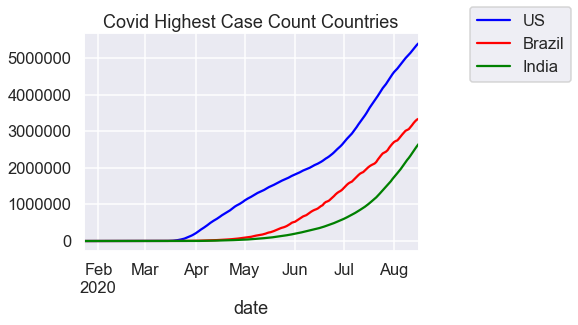

In [37]:
### HIGHEST cases, compare to
#https://www.forbes.com/sites/johnkoetsier/2020/06/05/the-100-safest-countries-in-the-world-for-covid-19/#795f154f68c5
ax = plt.gca()
plt.title('Covid Highest Case Count Countries')
df3[df3.country_region.str.contains('US',case=True)].plot(kind='line',x='date',y='cases',color='blue',label='US',ax=ax)
df3[df3.country_region.str.contains('Brazil',case=True)].plot(kind='line',x='date',y='cases',color='red',label='Brazil',ax=ax)
df3[df3.country_region.str.contains('India',case=True)].plot(kind='line',x='date',y='cases',color='green',label='India',ax=ax)
#df3[df3.country_region.str.contains('Russia',case=True)].plot(kind='line',x='date',y='cases',color='yellow',label='Russia',ax=ax)
plt.legend(bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)
plt.show()

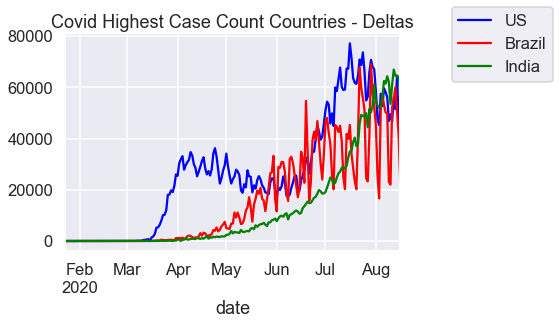

In [38]:
### HIGHEST cases, compare to
#https://www.forbes.com/sites/johnkoetsier/2020/06/05/the-100-safest-countries-in-the-world-for-covid-19/#795f154f68c5
ax = plt.gca()
plt.title('Covid Highest Case Count Countries - Deltas')
df3[df3.country_region.str.contains('US',case=True)].plot(kind='line',x='date',y='casesdelta',color='blue',label='US',ax=ax)
df3[df3.country_region.str.contains('Brazil',case=True)].plot(kind='line',x='date',y='casesdelta',color='red',label='Brazil',ax=ax)
df3[df3.country_region.str.contains('India',case=True)].plot(kind='line',x='date',y='casesdelta',color='green',label='India',ax=ax)
#df3[df3.country_region.str.contains('Russia',case=True)].plot(kind='line',x='date',y='casesdelta',color='yellow',label='Russia',ax=ax)
plt.legend(bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)
plt.show()

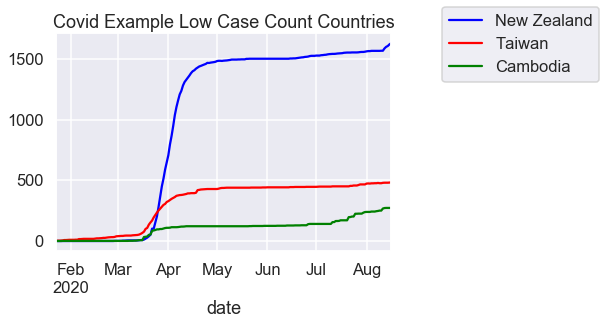

In [39]:
### GOOD
ax = plt.gca()
plt.title('Covid Example Low Case Count Countries')
df3[df3.country_region.str.contains('New Zealand',case=True)].plot(kind='line',x='date',y='cases',color='blue',label='New Zealand',ax=ax)
#df3[df3.country_region.str.contains('Vietnam',case=True)].plot(kind='line',x='date',y='cases',color='yellow',label='Vietnam',ax=ax)
df3[df3.country_region.str.contains('Taiwan',case=True)].plot(kind='line',x='date',y='cases',color='red',label='Taiwan',ax=ax)
df3[df3.country_region.str.contains('Cambodia',case=True)].plot(kind='line',x='date',y='cases',color='green',label='Cambodia',ax=ax)
plt.legend(bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)
plt.show()

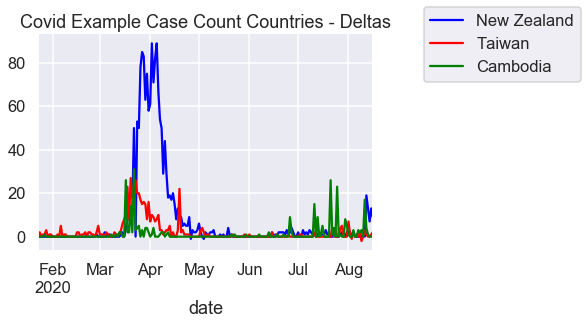

In [40]:
ax = plt.gca()
plt.title('Covid Example Case Count Countries - Deltas')
df3[df3.country_region.str.contains('New Zealand',case=True)].plot(kind='line',x='date',y='casesdelta',color='blue',label='New Zealand',ax=ax)
#df3[df3.country_region.str.contains('Vietnam',case=True)].plot(kind='line',x='date',y='casesdelta',color='yellow',label='Vietnam',ax=ax)
df3[df3.country_region.str.contains('Taiwan',case=True)].plot(kind='line',x='date',y='casesdelta',color='red',label='Taiwan',ax=ax)
df3[df3.country_region.str.contains('Cambodia',case=True)].plot(kind='line',x='date',y='casesdelta',color='green',label='Cambodia',ax=ax)
plt.legend(bbox_to_anchor=(1.4, 1), bbox_transform=plt.gcf().transFigure)
plt.show()

In [41]:
####### Display yesterdays LOWEST cases count by country
# df3[(df3['date'] > )].sort_values(by='cases',ascending=False).tail(60)
df3[(df3['date'] > validation_date) & ((df3.country_region.str.contains('New Zealand',case=True)) | (df3.country_region.str.contains('Taiwan',case=True)))].sort_values(by='cases',ascending=False).tail(60)

,country_region,date,cases,deaths,casesdelta,deathsdelta,casesdelta14,deathsdelta14
25791,New Zealand,2020-08-16,1631,22,9.0,0.0,0.0,0.0
34527,Taiwan,2020-08-16,484,7,2.0,0.0,-1.0,0.0


### Phone Mobility Data - 6 fields, usually 3 to 4 days behind current date due to processing
### Data starts 2020-02-15, takes 3-4 days to process and post so never current

In [42]:
#################################################
#################################################3
# Get mobility data, clean and in same format as above for merge
###############################################
#https://honingds.com/blog/pandas-read_csv/
#mobility_csv = pd.read_csv("CGlobal_Mobility_Report.csv", na_filter=False, index_col = ["country_region","date"])
#na_filter=False
#TODO documentation recommends not comparing with 2 fields 
#  'parks_percent_change_from_baseline','residential_percent_change_from_baseline'
mobility_csv = pd.read_csv("https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv")
#mobility_csv = pd.read_csv("https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv", usecols = ['country_region','date','retail_and_recreation_percent_change_from_baseline','grocery_and_pharmacy_percent_change_from_baseline','transit_stations_percent_change_from_baseline','workplaces_percent_change_from_baseline','parks_percent_change_from_baseline','residential_percent_change_from_baseline'])

C:\Users\mabdu\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [43]:
# rename fields for plotting
mobility_csv = mobility_csv.rename(columns={'transit_stations_percent_change_from_baseline':'transit'})
mobility_csv = mobility_csv.rename(columns={'retail_and_recreation_percent_change_from_baseline':'retailrec'})
mobility_csv = mobility_csv.rename(columns={'grocery_and_pharmacy_percent_change_from_baseline':'grocerrx'})
mobility_csv = mobility_csv.rename(columns={'workplaces_percent_change_from_baseline':'work'})
mobility_csv = mobility_csv.rename(columns={'parks_percent_change_from_baseline':'parks'})
mobility_csv = mobility_csv.rename(columns={'residential_percent_change_from_baseline':'reside'})

In [44]:
#Investigate raw data, per documentation
# metro_area is a new column added August 2020
#transit data has most sparse data (rural areas don't have transit)
#Some countries not present, ie China
mobility_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1834167 entries, 0 to 1834166
Data columns (total 14 columns):
country_region_code    object
country_region         object
sub_region_1           object
sub_region_2           object
metro_area             object
iso_3166_2_code        object
census_fips_code       float64
date                   object
retailrec              float64
grocerrx               float64
parks                  float64
transit                float64
work                   float64
reside                 float64
dtypes: float64(7), object(7)
memory usage: 146.9+ MB


In [45]:
# date here is a non-null object, convert to allow merge with covid datetime object
mobility_csv['date'] = pd.to_datetime(mobility_csv['date'])

In [46]:
mobility_csv['country_region'] = mobility_csv['country_region'].astype(str)

In [47]:
# Observe mobility data has rows aggregated at different levels
# for country only, will have nulls NaN for the following fields
#  sub_region_1 
#  sub_region_2 
#  metro_area 
#  iso_3166_2_code 
#  census_fips_code 
mobility_csv[mobility_csv.country_region.str.contains('United States',case=True)]

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retailrec,grocerrx,parks,transit,work,reside
1329532,US,United States,NaN,NaN,NaN,NaN,NaN,2020-02-15,6.0,2.0,15.0,3.0,2.0,-1.0
1329533,US,United States,NaN,NaN,NaN,NaN,NaN,2020-02-16,7.0,1.0,16.0,2.0,0.0,-1.0
1329534,US,United States,NaN,NaN,NaN,NaN,NaN,2020-02-17,6.0,0.0,28.0,-9.0,-24.0,5.0
1329535,US,United States,NaN,NaN,NaN,NaN,NaN,2020-02-18,0.0,-1.0,6.0,1.0,0.0,1.0
1329536,US,United States,NaN,NaN,NaN,NaN,NaN,2020-02-19,2.0,0.0,8.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1812809,US,United States,Wyoming,Weston County,NaN,NaN,56045.0,2020-08-10,NaN,NaN,NaN,NaN,-27.0,NaN
1812810,US,United States,Wyoming,Weston County,NaN,NaN,56045.0,2020-08-11,NaN,NaN,NaN,NaN,-22.0,NaN
1812811,US,United States,Wyoming,Weston County,NaN,NaN,56045.0,2020-08-12,NaN,NaN,NaN,NaN,-24.0,NaN
1812812,US,United States,Wyoming,Weston County,NaN,NaN,56045.0,2020-08-13,NaN,NaN,NaN,NaN,-24.0,NaN


In [48]:
# Retrieve only Country level mobility data has nulls NaN for the following fields
mobility_csv = mobility_csv[\
    (mobility_csv.sub_region_1.isna())\
  & (mobility_csv.sub_region_2.isna())\
  & (mobility_csv.metro_area.isna())\
  & (mobility_csv.iso_3166_2_code.isna())\
  & (mobility_csv.census_fips_code.isna())\
]

In [49]:
mobility_csv[mobility_csv.country_region.str.contains('United States',case=True)]

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retailrec,grocerrx,parks,transit,work,reside
1329532,US,United States,NaN,NaN,NaN,NaN,NaN,2020-02-15,6.0,2.0,15.0,3.0,2.0,-1.0
1329533,US,United States,NaN,NaN,NaN,NaN,NaN,2020-02-16,7.0,1.0,16.0,2.0,0.0,-1.0
1329534,US,United States,NaN,NaN,NaN,NaN,NaN,2020-02-17,6.0,0.0,28.0,-9.0,-24.0,5.0
1329535,US,United States,NaN,NaN,NaN,NaN,NaN,2020-02-18,0.0,-1.0,6.0,1.0,0.0,1.0
1329536,US,United States,NaN,NaN,NaN,NaN,NaN,2020-02-19,2.0,0.0,8.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1329709,US,United States,NaN,NaN,NaN,NaN,NaN,2020-08-10,-14.0,-5.0,47.0,-32.0,-38.0,9.0
1329710,US,United States,NaN,NaN,NaN,NaN,NaN,2020-08-11,-13.0,-3.0,57.0,-31.0,-38.0,10.0
1329711,US,United States,NaN,NaN,NaN,NaN,NaN,2020-08-12,-13.0,-4.0,51.0,-32.0,-37.0,10.0
1329712,US,United States,NaN,NaN,NaN,NaN,NaN,2020-08-13,-14.0,-3.0,53.0,-31.0,-37.0,10.0


In [50]:
# Now retain only necessary columns, drop country unused columns
dfm = mobility_csv[["country_region", "date","retailrec","grocerrx","transit","work","parks","reside"]]

In [51]:
dfm

,country_region,date,retailrec,grocerrx,transit,work,parks,reside
0,United Arab Emirates,2020-02-15,0.0,4.0,0.0,2.0,5.0,1.0
1,United Arab Emirates,2020-02-16,1.0,4.0,1.0,2.0,4.0,1.0
2,United Arab Emirates,2020-02-17,-1.0,1.0,1.0,2.0,5.0,1.0
3,United Arab Emirates,2020-02-18,-2.0,1.0,0.0,2.0,5.0,1.0
4,United Arab Emirates,2020-02-19,-2.0,0.0,-1.0,2.0,4.0,1.0
...,...,...,...,...,...,...,...,...
1831009,Zimbabwe,2020-08-10,-39.0,-31.0,-54.0,-67.0,-10.0,36.0
1831010,Zimbabwe,2020-08-11,-40.0,-32.0,-56.0,-67.0,-21.0,35.0
1831011,Zimbabwe,2020-08-12,-18.0,-11.0,-31.0,-22.0,-5.0,24.0
1831012,Zimbabwe,2020-08-13,-15.0,-6.0,-31.0,-22.0,-3.0,26.0


In [52]:
dfm.dtypes

country_region            object
date              datetime64[ns]
retailrec                float64
grocerrx                 float64
transit                  float64
work                     float64
parks                    float64
reside                   float64
dtype: object

In [54]:
# Modify country region to match merged covid data
# Count before and after to confirm changes
#dfm[dfm.country_region.str.contains('United States',case=True)]
dfm[dfm.country_region.str.contains('United States',case=True)].count()

country_region    182
date              182
retailrec         182
grocerrx          182
transit           182
work              182
parks             182
reside            182
dtype: int64

In [55]:
#mobility locate and rename country = 'United States' to 'US' to match Covid data
dfm = dfm.replace(to_replace ="United States", value ="US")
#, regex=True)

In [56]:
dfm[dfm.country_region.str.contains('US',case=True)]

,country_region,date,retailrec,grocerrx,transit,work,parks,reside
1329532,US,2020-02-15,6.0,2.0,3.0,2.0,15.0,-1.0
1329533,US,2020-02-16,7.0,1.0,2.0,0.0,16.0,-1.0
1329534,US,2020-02-17,6.0,0.0,-9.0,-24.0,28.0,5.0
1329535,US,2020-02-18,0.0,-1.0,1.0,0.0,6.0,1.0
1329536,US,2020-02-19,2.0,0.0,1.0,1.0,8.0,0.0
...,...,...,...,...,...,...,...,...
1329709,US,2020-08-10,-14.0,-5.0,-32.0,-38.0,47.0,9.0
1329710,US,2020-08-11,-13.0,-3.0,-31.0,-38.0,57.0,10.0
1329711,US,2020-08-12,-13.0,-4.0,-32.0,-37.0,51.0,10.0
1329712,US,2020-08-13,-14.0,-3.0,-31.0,-37.0,53.0,10.0


### Merge Datasets - pre-check

In [57]:
#####################################
# PREPARE to MERGE Covid df3 and mobility dfm dataframes
# CONFIRM datatypes index, info(non-null data)
# review covid data
df3.dtypes

country_region            object
date              datetime64[ns]
cases                      int64
deaths                     int64
casesdelta               float64
deathsdelta              float64
casesdelta14             float64
deathsdelta14            float64
dtype: object

In [58]:
#review mobility types
dfm.dtypes

country_region            object
date              datetime64[ns]
retailrec                float64
grocerrx                 float64
transit                  float64
work                     float64
parks                    float64
reside                   float64
dtype: object

### https://towardsdatascience.com/cleaning-financial-time-series-data-with-python-f30a3ed580b7

In [59]:
##https://towardsdatascience.com/cleaning-financial-time-series-data-with-python-f30a3ed580b7
    
# get the shape of the different datasets
dflist = [df3, dfm]
for i, dfr in enumerate(dflist):
 print(dflist[i].shape)

(38916, 8)
(24435, 8)


In [60]:
# look at the statistical charateristics of the datasets
for i, dfr in enumerate(dflist):
    print(dflist[i].describe())

              cases         deaths    casesdelta   deathsdelta  casesdelta14  \
count  3.891600e+04   38916.000000  38916.000000  38916.000000  3.890300e+04   
mean   3.117402e+04    1487.579633    556.882285     19.920521 -6.538313e+00   
std    2.009690e+05    8604.481840   3581.223754    120.464958  3.626732e+04   
min    0.000000e+00       0.000000 -10034.000000  -1918.000000 -5.403213e+06   
25%    6.000000e+00       0.000000      0.000000      0.000000  0.000000e+00   
50%    4.320000e+02       7.000000      4.000000      0.000000  4.000000e+00   
75%    5.468250e+03     110.000000     98.000000      2.000000  9.500000e+01   
max    5.403213e+06  170052.000000  77255.000000   4143.000000  7.725500e+04   

       deathsdelta14  
count   38903.000000  
mean       -0.176593  
std      1184.963625  
min   -170052.000000  
25%         0.000000  
50%         0.000000  
75%         2.000000  
max      4143.000000  
          retailrec      grocerrx       transit          work         pa

In [61]:
# see which datasets have null values
for i, dfr in enumerate(dflist):
    print( i, dflist[i].isnull().sum().sum() )

0 26
1 1843


In [62]:
# How to manage null values, I created 13*2=26 in casesdelta14 and deathsdelta14 
#Decide to merge and then check for nulls

In [63]:
# Verify null values in covid, except in delta14 that I generated
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38916 entries, 1 to 39103
Data columns (total 8 columns):
country_region    38916 non-null object
date              38916 non-null datetime64[ns]
cases             38916 non-null int64
deaths            38916 non-null int64
casesdelta        38916 non-null float64
deathsdelta       38916 non-null float64
casesdelta14      38903 non-null float64
deathsdelta14     38903 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 2.5+ MB


In [64]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24435 entries, 0 to 1831013
Data columns (total 8 columns):
country_region    24435 non-null object
date              24435 non-null datetime64[ns]
retailrec         24173 non-null float64
grocerrx          24117 non-null float64
transit           24247 non-null float64
work              24369 non-null float64
parks             24127 non-null float64
reside            23734 non-null float64
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 1.6+ MB


#end of Cleaning Financial Time Series

In [65]:
# MERGE df3 covid and dfm mobility data
#If joining columns on columns, the DataFrame indexes will be ignored, below did not work without the suffixes parameter?
dfmrg = df3.merge(dfm, left_on=['country_region','date'], right_on=['country_region','date'], suffixes=('_left', '_right'))

In [66]:
dfmrg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22797 entries, 0 to 22796
Data columns (total 14 columns):
country_region    22797 non-null object
date              22797 non-null datetime64[ns]
cases             22797 non-null int64
deaths            22797 non-null int64
casesdelta        22797 non-null float64
deathsdelta       22797 non-null float64
casesdelta14      22797 non-null float64
deathsdelta14     22797 non-null float64
retailrec         22542 non-null float64
grocerrx          22498 non-null float64
transit           22609 non-null float64
work              22745 non-null float64
parks             22507 non-null float64
reside            22325 non-null float64
dtypes: datetime64[ns](1), float64(10), int64(2), object(1)
memory usage: 2.5+ MB


In [ ]:
##null_columns=dfmrg.columns[dfmrg.isnull().any()]
##print(dfmrg[dfmrg.isnull().any(axis=1)][null_columns].head())

In [ ]:
# Save file for plots and analysis, decide how to clean nulls later

In [67]:
dfmrg[dfmrg.country_region.str.contains('New Zealand',case=True)]

,country_region,date,cases,deaths,casesdelta,deathsdelta,casesdelta14,deathsdelta14,retailrec,grocerrx,transit,work,parks,reside
14106,New Zealand,2020-02-15,0,0,0.0,0.0,0.0,0.0,8.0,5.0,8.0,4.0,0.0,0.0
14107,New Zealand,2020-02-16,0,0,0.0,0.0,0.0,0.0,4.0,4.0,7.0,0.0,-11.0,1.0
14108,New Zealand,2020-02-17,0,0,0.0,0.0,0.0,0.0,-2.0,-2.0,15.0,31.0,-5.0,-3.0
14109,New Zealand,2020-02-18,0,0,0.0,0.0,0.0,0.0,-1.0,2.0,8.0,15.0,1.0,-1.0
14110,New Zealand,2020-02-19,0,0,0.0,0.0,0.0,0.0,1.0,2.0,11.0,14.0,0.0,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14283,New Zealand,2020-08-10,1570,22,1.0,0.0,2.0,0.0,-9.0,-10.0,-20.0,13.0,-15.0,2.0
14284,New Zealand,2020-08-11,1570,22,0.0,0.0,1.0,0.0,-11.0,-9.0,-25.0,-1.0,-23.0,4.0
14285,New Zealand,2020-08-12,1589,22,19.0,0.0,0.0,0.0,-18.0,5.0,-43.0,-15.0,-30.0,10.0
14286,New Zealand,2020-08-13,1602,22,13.0,0.0,2.0,0.0,-30.0,-11.0,-51.0,-20.0,-29.0,13.0


In [68]:
dfmrg[dfmrg.country_region.str.contains('US',case=True)]

,country_region,date,cases,deaths,casesdelta,deathsdelta,casesdelta14,deathsdelta14,retailrec,grocerrx,transit,work,parks,reside
20795,US,2020-02-15,13,0,0.0,0.0,0.0,0.0,6.0,2.0,3.0,2.0,15.0,-1.0
20796,US,2020-02-16,13,0,0.0,0.0,3.0,0.0,7.0,1.0,2.0,0.0,16.0,-1.0
20797,US,2020-02-17,13,0,0.0,0.0,0.0,0.0,6.0,0.0,-9.0,-24.0,28.0,5.0
20798,US,2020-02-18,13,0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,6.0,1.0
20799,US,2020-02-19,13,0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0,8.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20972,US,2020-08-10,5094400,163463,49536.0,525.0,65869.0,1368.0,-14.0,-5.0,-32.0,-38.0,47.0,9.0
20973,US,2020-08-11,5141208,164527,46808.0,1064.0,70776.0,1436.0,-13.0,-3.0,-31.0,-38.0,57.0,10.0
20974,US,2020-08-12,5197411,166034,56203.0,1507.0,68033.0,1216.0,-13.0,-4.0,-32.0,-37.0,51.0,10.0
20975,US,2020-08-13,5248958,167110,51547.0,1076.0,67092.0,1246.0,-14.0,-3.0,-31.0,-37.0,53.0,10.0


In [69]:
dfmrg.shape

(22797, 14)

In [70]:
# Output merged and clean file for analysis
dfmrg.to_csv(path_or_buf='PracticumMergedData20200817.csv', index = False)